In [19]:
# Animating chirp scans
# Documentation of matplotlib.animation: https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html

from matplotlib import patches as ptc
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors as colors
import pickle
import numpy as np
from IPython.display import HTML, Image


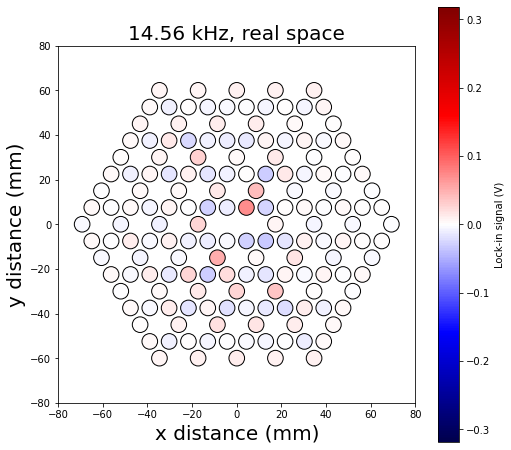

In [18]:
# making the animation with matplotlib.animation


radius = 3.5 # Cavity radius: [mm]

folder = "../../data/kagome-02.26.2022-center/" # Data folder

# Load data from preprocessd file. Can only plot real space data at one frequency
# Real data format: [x_coord, y_coord, amplitude, phase]
with open(folder + "preprocessed_real/_14560.0_0.pkl",'rb') as f: 
    real_data = pickle.load(f)    
    
# Find max amplitude for colorbar
max_amp = np.max(real_data, axis=0)[2]

# Figure settings
freq = 14.56
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_aspect("equal")
ax.set_xlim(-80, 80)
ax.set_ylim(-80, 80)
ax.set_xlabel("x distance (mm)", fontsize=20)
ax.set_ylabel("y distance (mm)", fontsize=20)
ax.set_title(str(freq) + " kHz, real space", fontsize=20)
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-max_amp, vmax=max_amp), cmap = "seismic"), ax=ax, label="Lock-in signal (V)")

cavities = []
ampdata = []
phasedata = []
t = 0 # initial time
dt = 0.1 # time step
x_unit = 4.33 # conversion factor from x_coord unit to mm
y_unit = 7.5 # conversion factor from y_coord unit to mm

for point in real_data: 
    x_center = point[0]*x_unit 
    y_center = point[1]*y_unit 
    
    
    ampdata.append(point[2])
    # If you want to rescale the amplitude color map, uncomment the line below
    # ampdata.append(np.sqrt(point[2])*np.sqrt(max_amp))
    phasedata.append(point[3])
    pressure = ampdata[-1]*np.sin(np.deg2rad(phasedata[-1]))

    # plot the 
    circle = ptc.Ellipse((x_center, y_center), 
                     width = radius*2, 
                     height = radius*2, 
                     edgecolor='black', facecolor = plt.cm.seismic((pressure+max_amp)/(2.0*max_amp)),
                     fill = True, alpha = 1)
    cavities.append(circle)
    ax.add_patch(cavities[-1])
    
def init():
    """initialize animation"""
    global cavities
      
    for i in range(len(cavities)):
        pressure = ampdata[i]*np.sin(np.deg2rad(phasedata[i]))  
        cavities[i].set_facecolor(plt.cm.seismic((pressure+max_amp)/(2.0*max_amp)))
                             
    return cavities
    
def animate(j):
    """perform animation step"""
    global t, dt, cavities, ampdata, phasedata
    t += dt
                            
    for i in range(len(cavities)):
        pressure = ampdata[i]*np.sin(np.deg2rad(phasedata[i]+j))
        cavities[i].set_facecolor(plt.cm.seismic((pressure+max_amp)/(2.0*max_amp)))
                             
    return cavities

# creating the animation
ani = animation.FuncAnimation(fig, animate, frames = 180, interval = 2, blit = True, init_func = init)

In [20]:
# saving the animation in a gif file
filename = '14.56kHz_sqrt.gif'
ani.save(folder + 'animations/' + filename, writer = 'imagemagick', fps = 120)

MovieWriter imagemagick unavailable; using Pillow instead.


In [14]:
# displaying the animation (works in jupyter notebook but might not work in vs code)

Image(url = folder + 'animations/' + filename)